In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# plotting params
%matplotlib inline
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
torch.manual_seed(423212)

## Loading MNIST

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       # transforms.Normalize((0.1307,), (0.3081,))
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                   ])),
    batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       # transforms.Normalize((0.1307,), (0.3081,))
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                   ])),
                    batch_size=10, shuffle=False)

## Auto-Encoder

We'll start with the simplest autoencoder: a single, fully-connected layer as the encoder and decoder.

In [4]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, encoding_dim)
        self.decoder = nn.Linear(encoding_dim, input_dim)

    def forward(self, x):
        encoded = F.relu(self.encoder(x))
        decoded = F.tanh(self.decoder(encoded))
        return decoded, encoded

In [5]:
input_dim = 784
encoding_dim = 32

model = AutoEncoder(input_dim, encoding_dim)
optimizer = optim.Adam(model.parameters())

In [6]:
def l1_penalty(var):
    return torch.abs(var).sum()

def train(epoch, l1_weight=1e-5):
    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data.view([-1, 784]))
        optimizer.zero_grad()
        
        decoder_out, encoder_out = model(data)
        mse_loss = F.mse_loss(decoder_out, data)
        l1_reg = l1_weight * l1_penalty(encoder_out)
        loss = mse_loss + l1_reg

        # output = model(data)
        # loss = F.mse_loss(output, data)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

In [7]:
num_epochs = 30

for epoch in range(1,  num_epochs + 1):
    train(epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.970128
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.469364
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.303272
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.274700
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.268970
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.249156
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.255584
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.246375
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.230465
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.240516
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.232490
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.213734
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.230494
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.220564
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.207116
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.216764
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.219703
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.211262
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.220656
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.207698
Train Epoch:

Train Epoch: 17 [32000/60000 (53%)]	Loss: 0.181457
Train Epoch: 17 [38400/60000 (64%)]	Loss: 0.179232
Train Epoch: 17 [44800/60000 (75%)]	Loss: 0.184184
Train Epoch: 17 [51200/60000 (85%)]	Loss: 0.175271
Train Epoch: 17 [57600/60000 (96%)]	Loss: 0.179108
Train Epoch: 18 [0/60000 (0%)]	Loss: 0.178627
Train Epoch: 18 [6400/60000 (11%)]	Loss: 0.182402
Train Epoch: 18 [12800/60000 (21%)]	Loss: 0.171773
Train Epoch: 18 [19200/60000 (32%)]	Loss: 0.174758
Train Epoch: 18 [25600/60000 (43%)]	Loss: 0.181951
Train Epoch: 18 [32000/60000 (53%)]	Loss: 0.180780
Train Epoch: 18 [38400/60000 (64%)]	Loss: 0.181016
Train Epoch: 18 [44800/60000 (75%)]	Loss: 0.178470
Train Epoch: 18 [51200/60000 (85%)]	Loss: 0.176105
Train Epoch: 18 [57600/60000 (96%)]	Loss: 0.178941
Train Epoch: 19 [0/60000 (0%)]	Loss: 0.177840
Train Epoch: 19 [6400/60000 (11%)]	Loss: 0.173338
Train Epoch: 19 [12800/60000 (21%)]	Loss: 0.175136
Train Epoch: 19 [19200/60000 (32%)]	Loss: 0.177079
Train Epoch: 19 [25600/60000 (43%)]	Loss: 0

In [9]:
# encode and decode the test set
data, _ = next(iter(test_loader))
data = Variable(data.view([-1, 784]), volatile=True)
true_imgs = data
encoded_imgs = F.relu(model.encoder(data))
decoded_imgs = model.decoder(encoded_imgs)

In [10]:
def to_img(x):
    x = x.data.numpy()
    x = 0.5 * (x + 1)
    x = np.clip(x, 0, 1)
    x = x.reshape([-1, 28, 28])
    return x

true_imgs = to_img(true_imgs)
decoded_imgs = to_img(decoded_imgs)

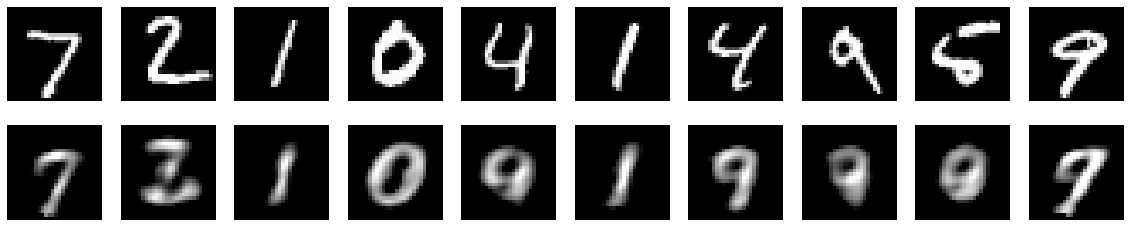

In [11]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(true_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('./plots/simple_l1_regularization_tanh.png', format='png', dpi=300)
plt.show()